In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft 
import math as m

In [2]:
def wavenum(i, N) : return (i + N // 2) % N - N // 2

0j
(0.14698077228042594+0j)
(0.532197868875058+0j)
(1.0095847204304778+0j)
(1.3977923349080832+0j)
(1.5477279221717455+0j)
(1.3965295446551103+0j)
(0.9877303029543543+0j)
(0.4510394761123797+0j)
(-0.04893171793577817+0j)
(-0.37397754671141314+0j)
(-0.04893171793577817+0j)
(0.4510394761123797+0j)
(0.9877303029543543+0j)
(1.3965295446551103+0j)
(1.5477279221717455+0j)
(1.3977923349080832+0j)
(1.0095847204304778+0j)
(0.532197868875058+0j)
(0.14698077228042594+0j)


Text(0.5, 0, 'Frequencies.')

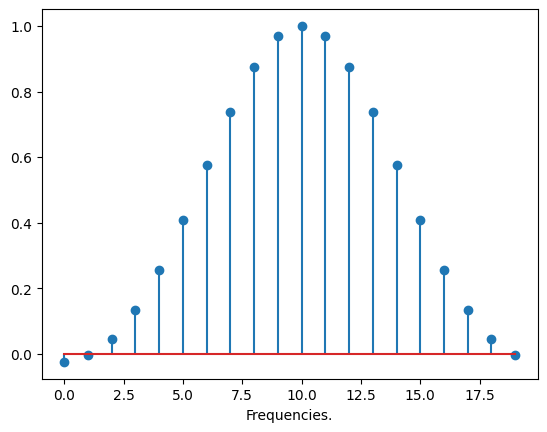

In [17]:
# Create filter.
filter_size = 20

M = 3/2
H = np.zeros(filter_size, dtype=complex)

for i in range(filter_size):
    k = wavenum(i, filter_size)
    a = 2 * np.pi / filter_size * k * M 
    
    #G_b, integral from -M to M of cos(t*pi/M) e^(-iwt)
    if (m.isclose(a, np.pi/M)):
        H[i] = M
    elif (m.isclose(a, -np.pi/M)):
        H[i] = M
    else:
        H[i] += -(2 * M**2 * a * np.sin(M * a))/(M**2 * a**2 - np.pi**2)

    print(H[i])
    # G_a, integral from -M to M of e^(-iwt)
    if a != 0:
        H[i] += 2 * np.sin(M * a) / a
    else:
        H[i] = 2 * M
        
        
H /= 2.0 * M

plt.stem(np.arange(filter_size),  np.fft.fftshift(H).real)
plt.xlabel("Frequencies.")

Text(0.5, 0, 'Time Domain')

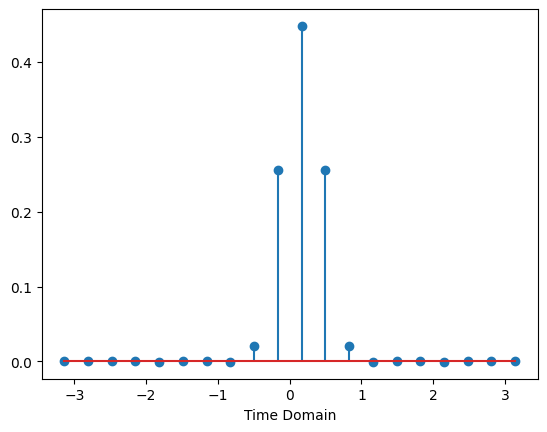

In [4]:
# Inverse Fourier Transform of the filter, fftshifted. TIME DOMAIN
h = np.fft.ifft(H)
plt.stem(np.linspace(-np.pi, np.pi, filter_size), np.fft.fftshift(h).real)
plt.xlabel("Time Domain")

Text(0.5, 0, 'Frequency domain')

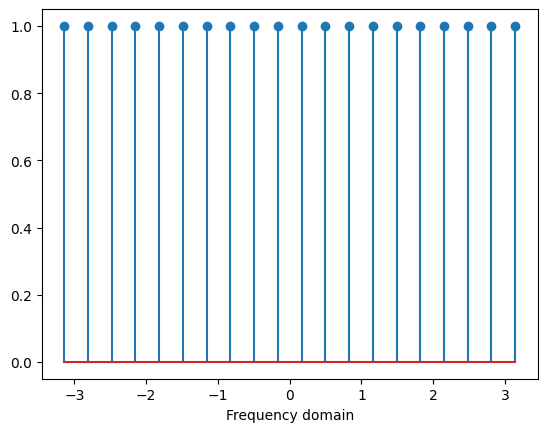

In [12]:
#Shift phase. Based on size of filter since it is that which we are shifting now.
SHIFT = 10
delta = SHIFT % 1
L = np.zeros(filter_size, dtype=complex)
for i in range(filter_size):
    L[i] = np.exp(-2j * np.pi * delta * wavenum(i,filter_size) /filter_size)
plt.stem(np.linspace(-np.pi, np.pi, filter_size), L.real)
plt.xlabel("Frequency domain")

Text(0.5, 0, 'Frequencies.')

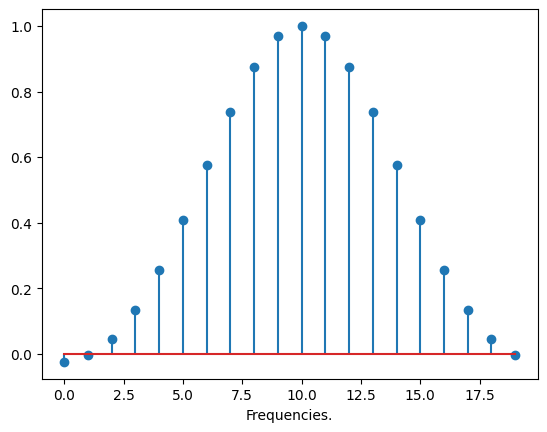

In [13]:
plt.stem(np.arange(filter_size), np.fft.fftshift((L * H).real))
plt.xlabel("Frequencies.")

(0.44835470933300475+0j)
(0.25626502002195467+0j)
(0.020357207460780718+0j)
(-0.000783114488379022+0j)
(-0.00013672453321156297+0j)
(0.00024687796495329945+0j)
(-0.0002442749400012087+0j)
(0.00022615374234922215+0j)
(-0.00021062329656202917+0j)
(0.00020107175848670399+0j)
(-0.00019789671374627034+0j)
(0.00020107175848672055+0j)
(-0.00021062329656202917+0j)
(0.00022615374234916656+0j)
(-0.0002442749400012071+0j)
(0.0002468779649532904+0j)
(-0.00013672453321156297+0j)
(-0.0007831144883790144+0j)
(0.02035720746078072+0j)
(0.25626502002195467+0j)


Text(0.5, 0, 'Time domain')

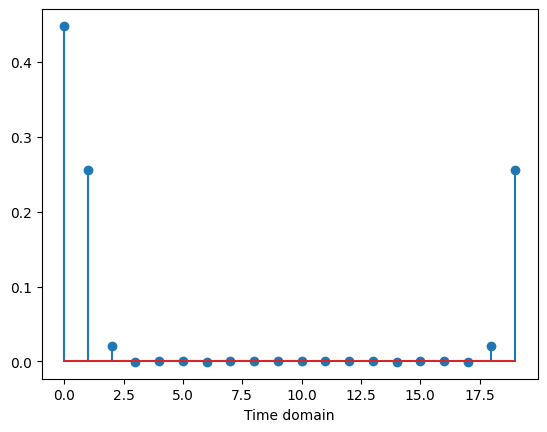

In [14]:
# Multiply filter by phase shift and do Inverse Fourier Transform.
z = np.fft.ifft(L * H)
for i in range(filter_size):
    print(z[i])
plt.stem(np.arange(filter_size),z.real)
plt.xlabel("Time domain")

Text(0.5, 0, 'Time domain')

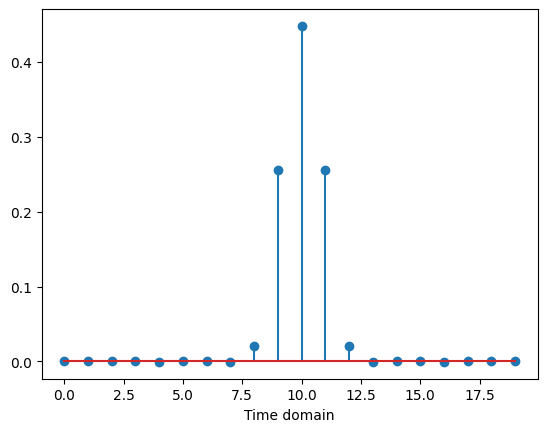

In [15]:
plt.stem(np.arange(filter_size), np.fft.fftshift(z).real)
plt.xlabel("Time domain")

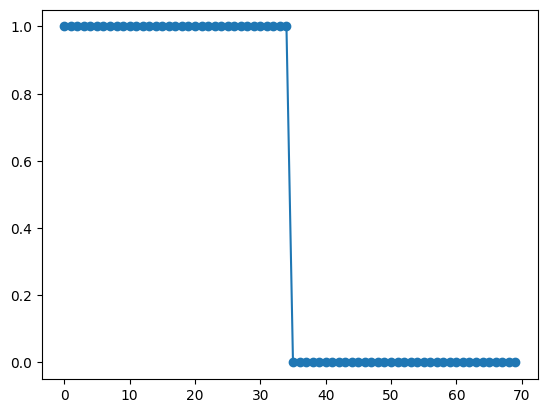

In [9]:
n = 70
x_o = np.arange(n)
xn = n * 0.5
x = x_o < xn
x = np.array(x)
plt.plot(x_o,x, marker ='o')

<StemContainer object of 3 artists>

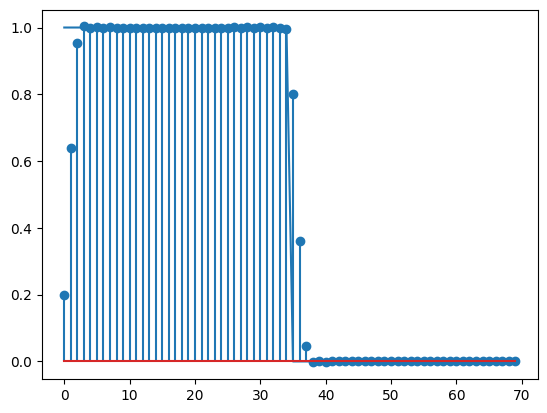

In [10]:
x_shifted_filter = np.zeros(n, dtype=complex)
x_shifted_filter = np.convolve(x,np.fft.fftshift(z), 'same')
plt.plot(x_o,x)
plt.stem(x_o,x_shifted_filter.real)

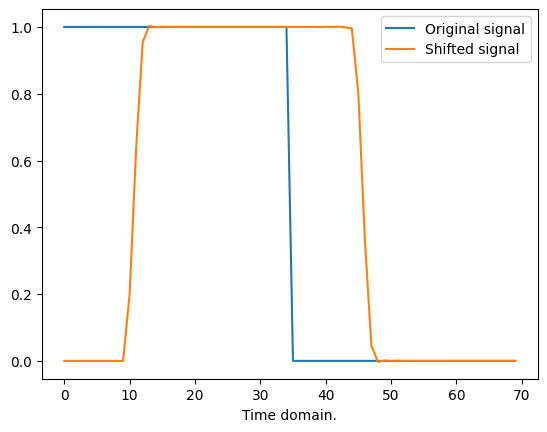

In [11]:
x_shifted = np.zeros(n, dtype=complex)
for i in range(n):
        new_index = (i + int(SHIFT)) % n
        x_shifted[new_index] = x_shifted_filter[i]
plt.plot(x_o,x, label="Original signal")
plt.plot(x_o,x_shifted.real, label= "Shifted signal")
plt.xlabel("Time domain.")
plt.legend()